<a href="https://colab.research.google.com/github/RaffaNimir/Match-Up-recruiter-/blob/main/(1)_Matchup_Recruiter_data_learning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from wordcloud import WordCloud

*Importing datasets*

In [ ]:
# importing datasets 

df1 = pd.read_csv("data.world.csv")
df2 = pd.read_csv("jobs_usa.csv")
df3 = pd.read_csv("kaggle_data.csv")

### Data Joining and Pre-Processing

Columns Kept from three datasets for Explorotary data analysis would be:
1. job_title 
2. salary 
3. job_description
4. company
5. location 
6. sector

In [ ]:
#showing columns
df1.columns

Index(['job_title', 'domain', 'company_name', 'location', 'job_description',
       'salary'],
      dtype='object')

In [ ]:
#dropping unneseccary columns 
df1 = df1.drop(['crawl_timestamp', 'url','state', 'country', 'inferred_city', 'inferred_state',
       'inferred_country', 'post_date', 'job_type', 'job_board', 'geo', 'cursor', 'contact_email',
       'contact_phone_number', 'uniq_id', 'html_job_description'], axis=1)

In [ ]:
#renaming columns for later data concatentation 

df1 = df1.rename(columns={'category': 'criteria', 'city': 'location', 'category':'domain', 'salary_offered':'salary'})


In [ ]:
# showing df2 column names 

df2.columns

Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'criteria', 'posted_date', 'link'],
      dtype='object')

In [ ]:
#dropping unneseccary columns 

df2 = df2.drop(['onsite_remote','posted_date', 'link'], axis=1)

In [ ]:
#renaming columns for later data concatentation 

df2 = df2.rename(columns={'title': 'job_title', 'company': 'company_name', 'description':'job_description','criteria':'domain'})


In [ ]:
#dropping unneseccary columns 

df2 = df2.drop(['domain'], axis =1 )

In [ ]:
#showing columns

df3.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

In [ ]:
#dropping unneseccary columns 

df3 = df3.drop(['Unnamed: 0', 'index','Rating','Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry','Revenue','Competitors', 'Easy Apply'], axis = 1)

In [ ]:
#renaming columns for later data concatentation 

df3 = df3.rename(columns = {'Job Title':'job_title','Salary Estimate':'salary', 'Company Name': 'company_name','Sector':'domain', 'Job Description':'job_description', 'Location':'location' })

In [ ]:
# concatinating df1 & df3 

concat_df = pd.concat([df1,df3], axis = 0)

In [ ]:
print(len(concat_df))

13916


In [ ]:
#conactinating concat_df with df2

jobs = pd.concat([concat_df,df2], axis = 0)

In [ ]:
print(len(jobs))

16761


In [ ]:
# showing final dataset 

jobs = pd.read_csv("jobs.csv")
jobs.sample(1)

,job_ID,job_title,domain,company_name,location,job_description,salary
12677,12678,Data Engineer,-1,IT Minds LLC,"Dallas, TX",Key Responsibilities:End to end ownership of E...,51K-79K (Glassdoor est.)


 ### Exploratory Data Analysis and Visulaizations
 
In this section; explorotary data analysis is implemented to extract :
1. information about top 30 nation's hiring companies.
3. salary analysis
4. domain representations 
4. top cities 
5. top titles appearnces

#### 1. Top 30 Nations Hiring Companies

In [ ]:
#grouping by titles and counting 
titles_count = jobs.groupby("job_title").size().reset_index(name ="counts")

In [ ]:
# sorting top 30 titles
top_titles = titles_count.sort_values("counts", ascending= False).head(30)
top_titles

,job_title,counts
991,Data Scientist,3163
677,Data Analyst,2356
3813,Senior Data Scientist,735
824,Data Engineer,260
4452,Sr. Data Scientist,226
2822,Lead Data Scientist,202
718,Data Analyst - Recent Graduate,183
3229,Principal Data Scientist,163
2774,Junior Data Analyst,154
1619,Data Scientist II,113


In [ ]:
#reordering in a descending order
top_titles = top_titles.iloc[::-1]

Text(0, 0.5, 'job_title')

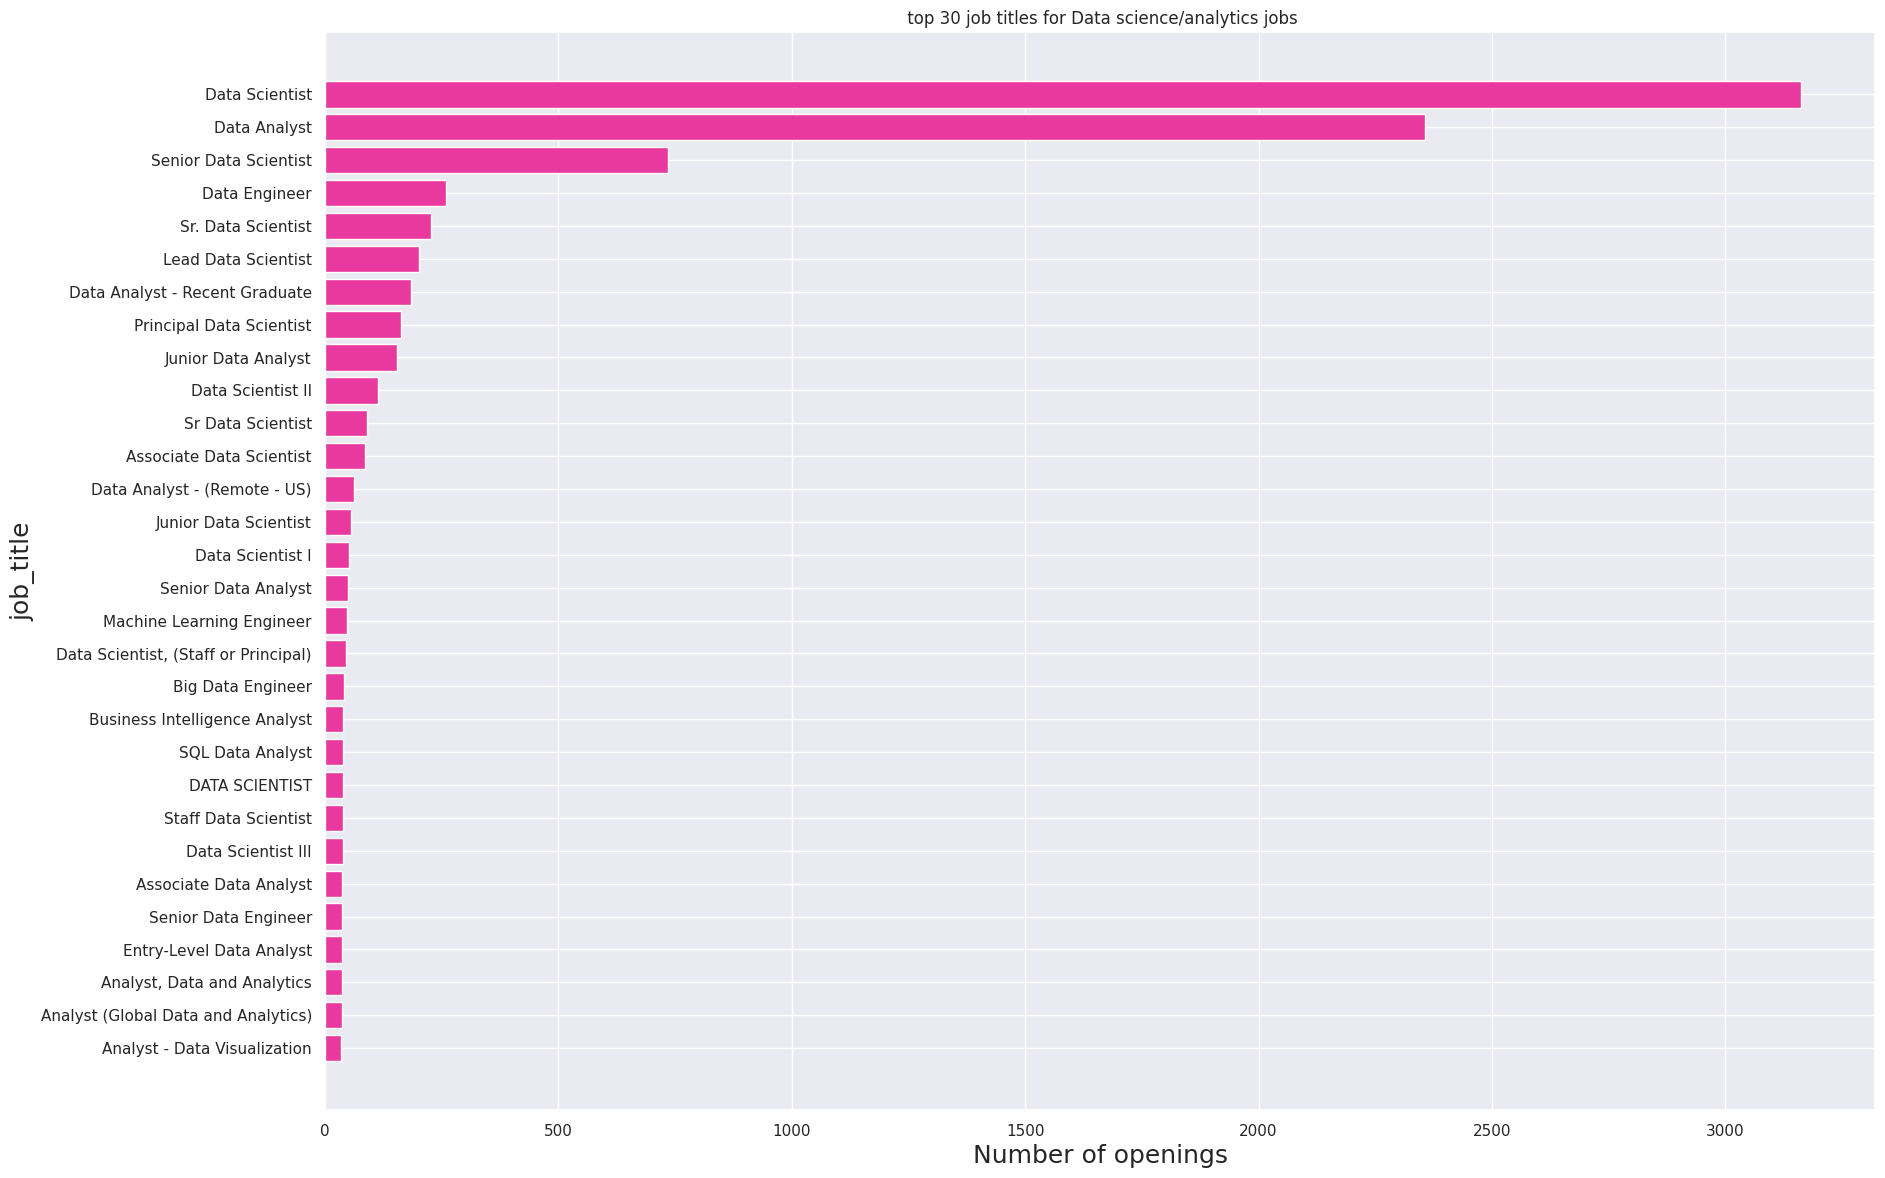

In [ ]:
# plotting the top 30 companies 
fig, ax = plt.subplots(figsize=(20, 14))
ax.barh(top_titles["job_title"], top_titles["counts"], color='#e9399e')
ax.set_title(" top 30 job titles for Data science/analytics jobs")
ax.set_xlabel("Number of openings", fontdict ={'fontsize':18 })
ax.set_ylabel("job_title",fontdict ={'fontsize':18 })

In [ ]:
# group by location and count the number of occurrences
cities_count = jobs.groupby('location').size().reset_index(name='counts')

# sort by count in descending order and take the top 30 cities
top_cities = cities_count.sort_values('counts', ascending=False).head(40)
top_cities

,location,counts
972,United States,725
657,New York,684
179,"Chicago, IL",483
848,San Francisco,474
52,"Austin, TX",417
660,"New York, NY",403
847,"San Diego, CA",321
178,Chicago,304
99,Boston,293
876,Seattle,276


In [ ]:
# remove rows where the City is 'New York'
top_cities = top_cities[top_cities['location'] != 'United States']

In [ ]:
top_cities

,location,counts
657,New York,684
179,"Chicago, IL",483
848,San Francisco,474
52,"Austin, TX",417
660,"New York, NY",403
847,"San Diego, CA",321
178,Chicago,304
99,Boston,293
876,Seattle,276
416,"Houston, TX",249


Text(0, 0.5, 'location')

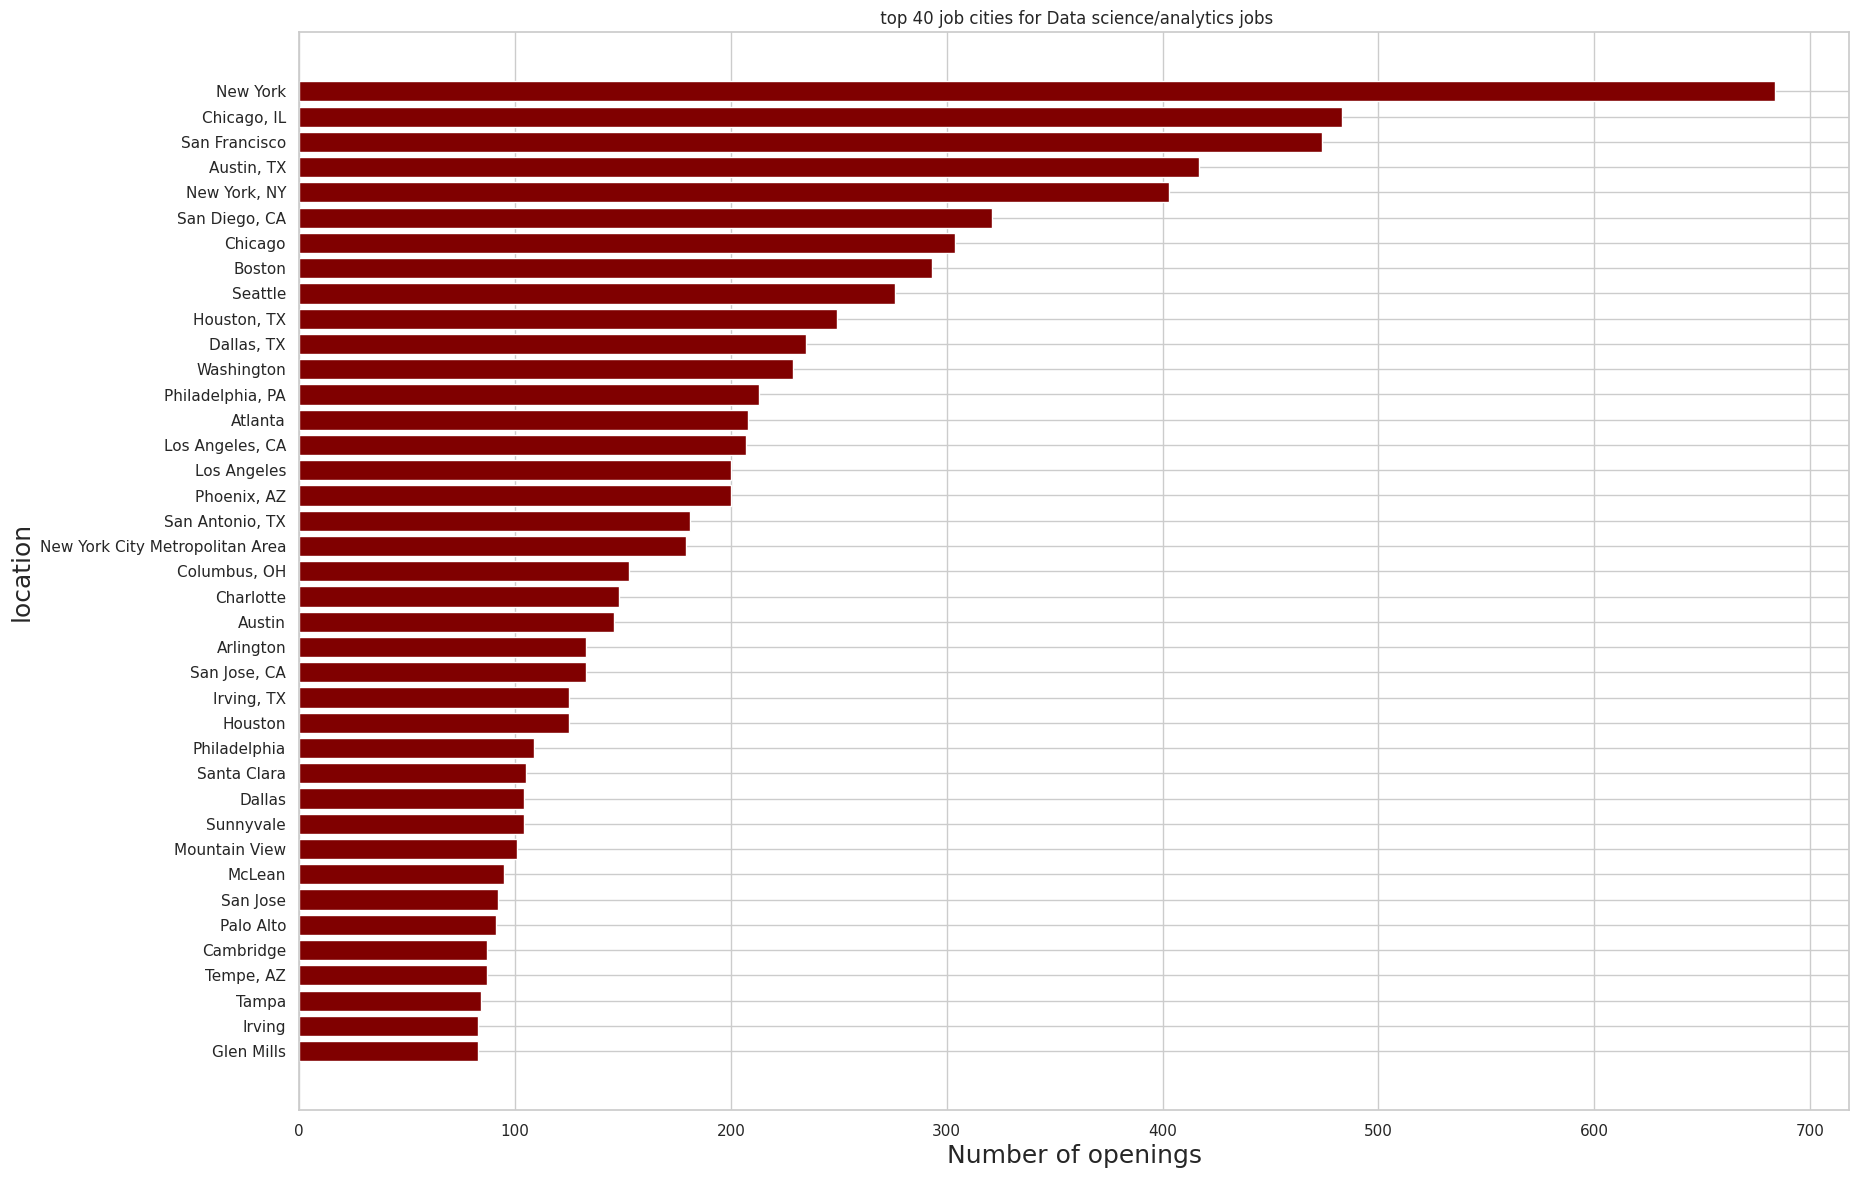

In [ ]:
#reordering in a descending order
top_cities = top_cities.iloc[::-1]
# plotting the top 30 companies 
fig, ax = plt.subplots(figsize=(20, 14))
ax.barh(top_cities["location"], top_cities["counts"], color='#800000')
ax.set_title(" top 40 job cities for Data science/analytics jobs")
ax.set_xlabel("Number of openings", fontdict ={'fontsize':18 })
ax.set_ylabel("location",fontdict ={'fontsize':18 })

In [ ]:
#groupbing by company name and counting 
company_counts = jobs.groupby("company_name").size().reset_index(name="counts")

In [ ]:
# sorting top 30 companies 
top_companies = company_counts.sort_values("counts", ascending= False).head(30)
top_companies

,company_name,counts
1867,CyberCoders,630
4287,PayPal,506
3214,Jefferson Frank,259
3054,Insight Global,100
3999,Nigel Frank International US,89
5318,Taboola,77
847,Booz Allen Hamilton,77
478,Apex Systems,73
3345,Kforce Technology,71
5509,The Judge Group,69


In [ ]:
#reordering in a descending order
top_companies = top_companies.iloc[::-1]

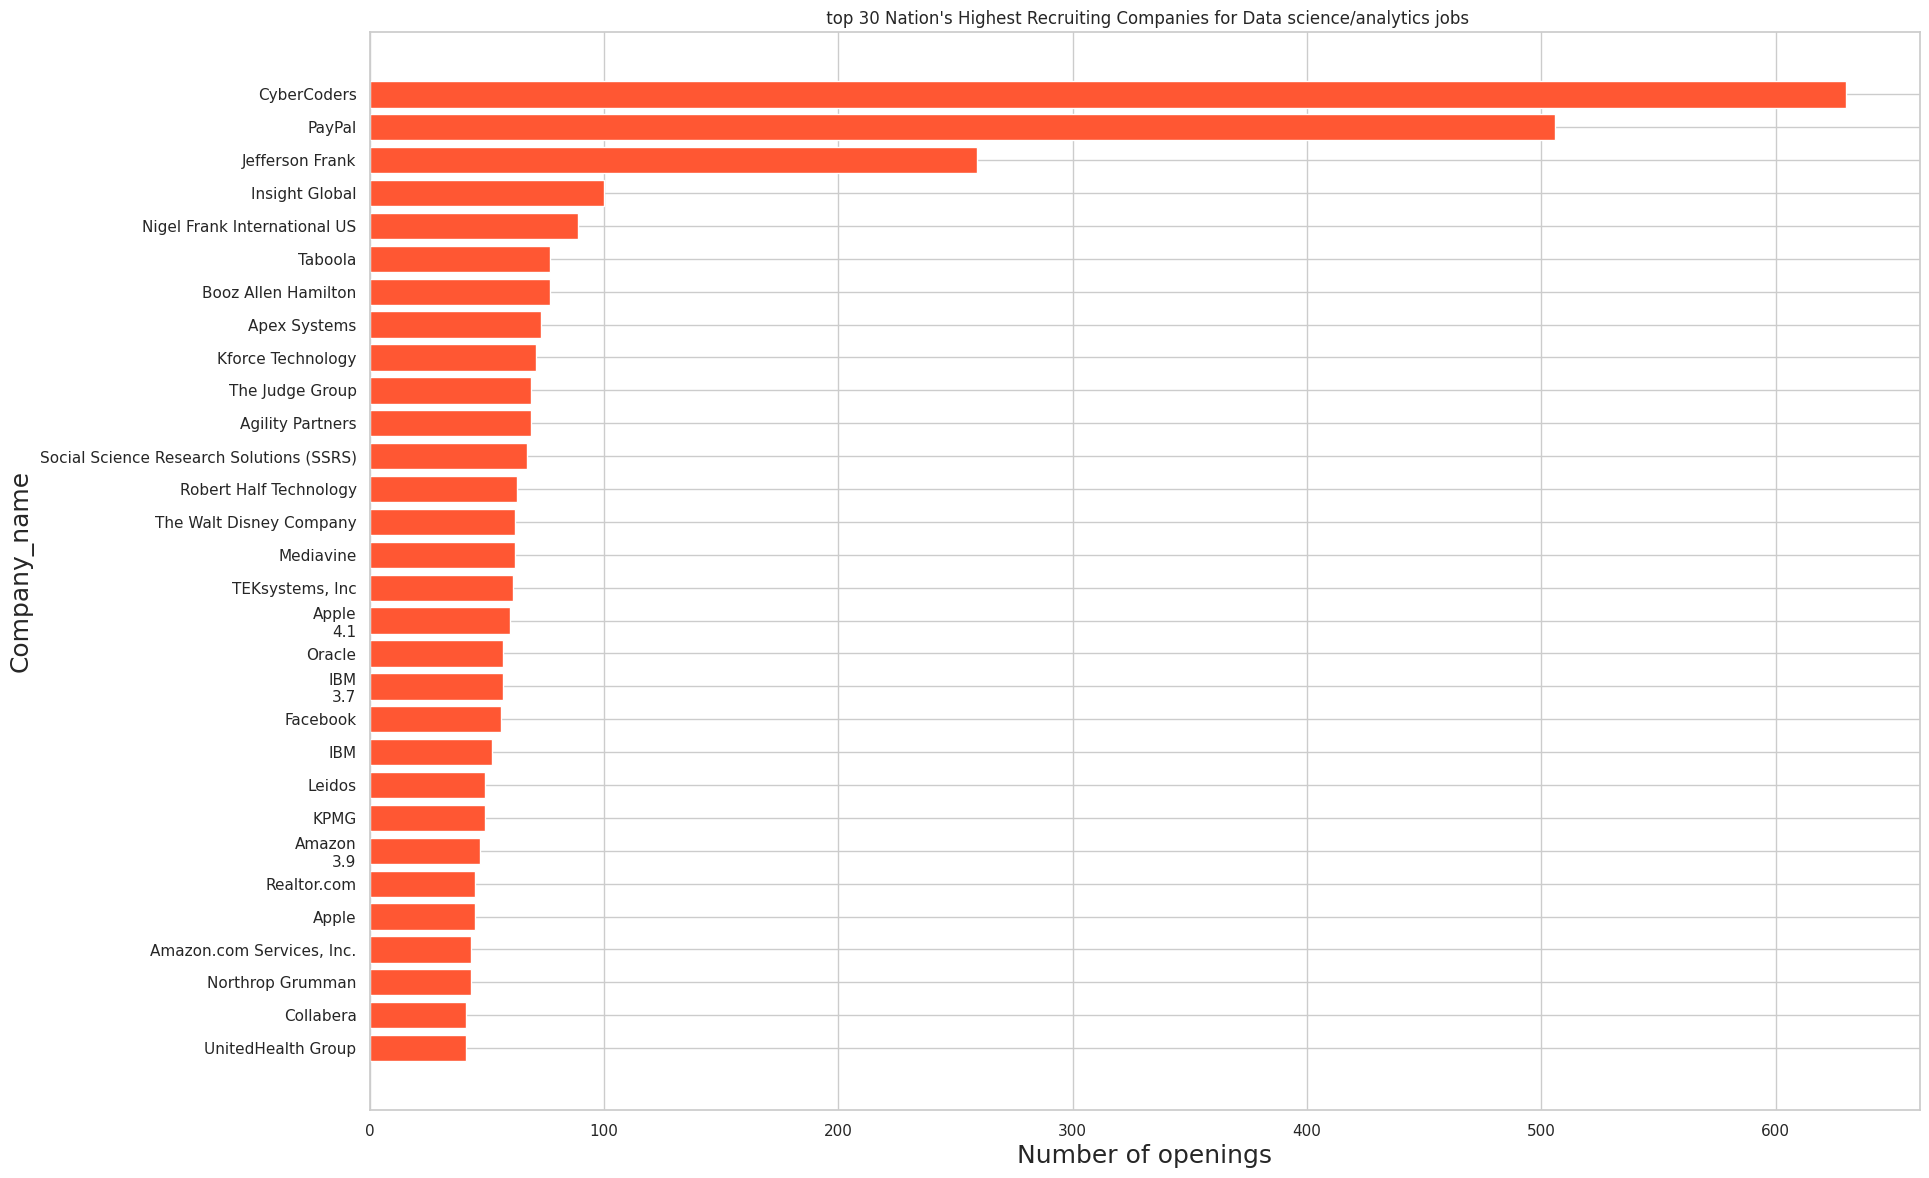

In [ ]:
# plotting the top 30 companies 
fig, ax = plt.subplots(figsize=(20, 14))
ax.barh(top_companies["company_name"], top_companies["counts"], color='#ff5733')
ax.set_title(" top 30 Nation's Highest Recruiting Companies for Data science/analytics jobs")
ax.set_xlabel("Number of openings", fontdict ={'fontsize':18 })
ax.set_ylabel("Company_name",fontdict ={'fontsize':18 })

plt.savefig('Companies.png')

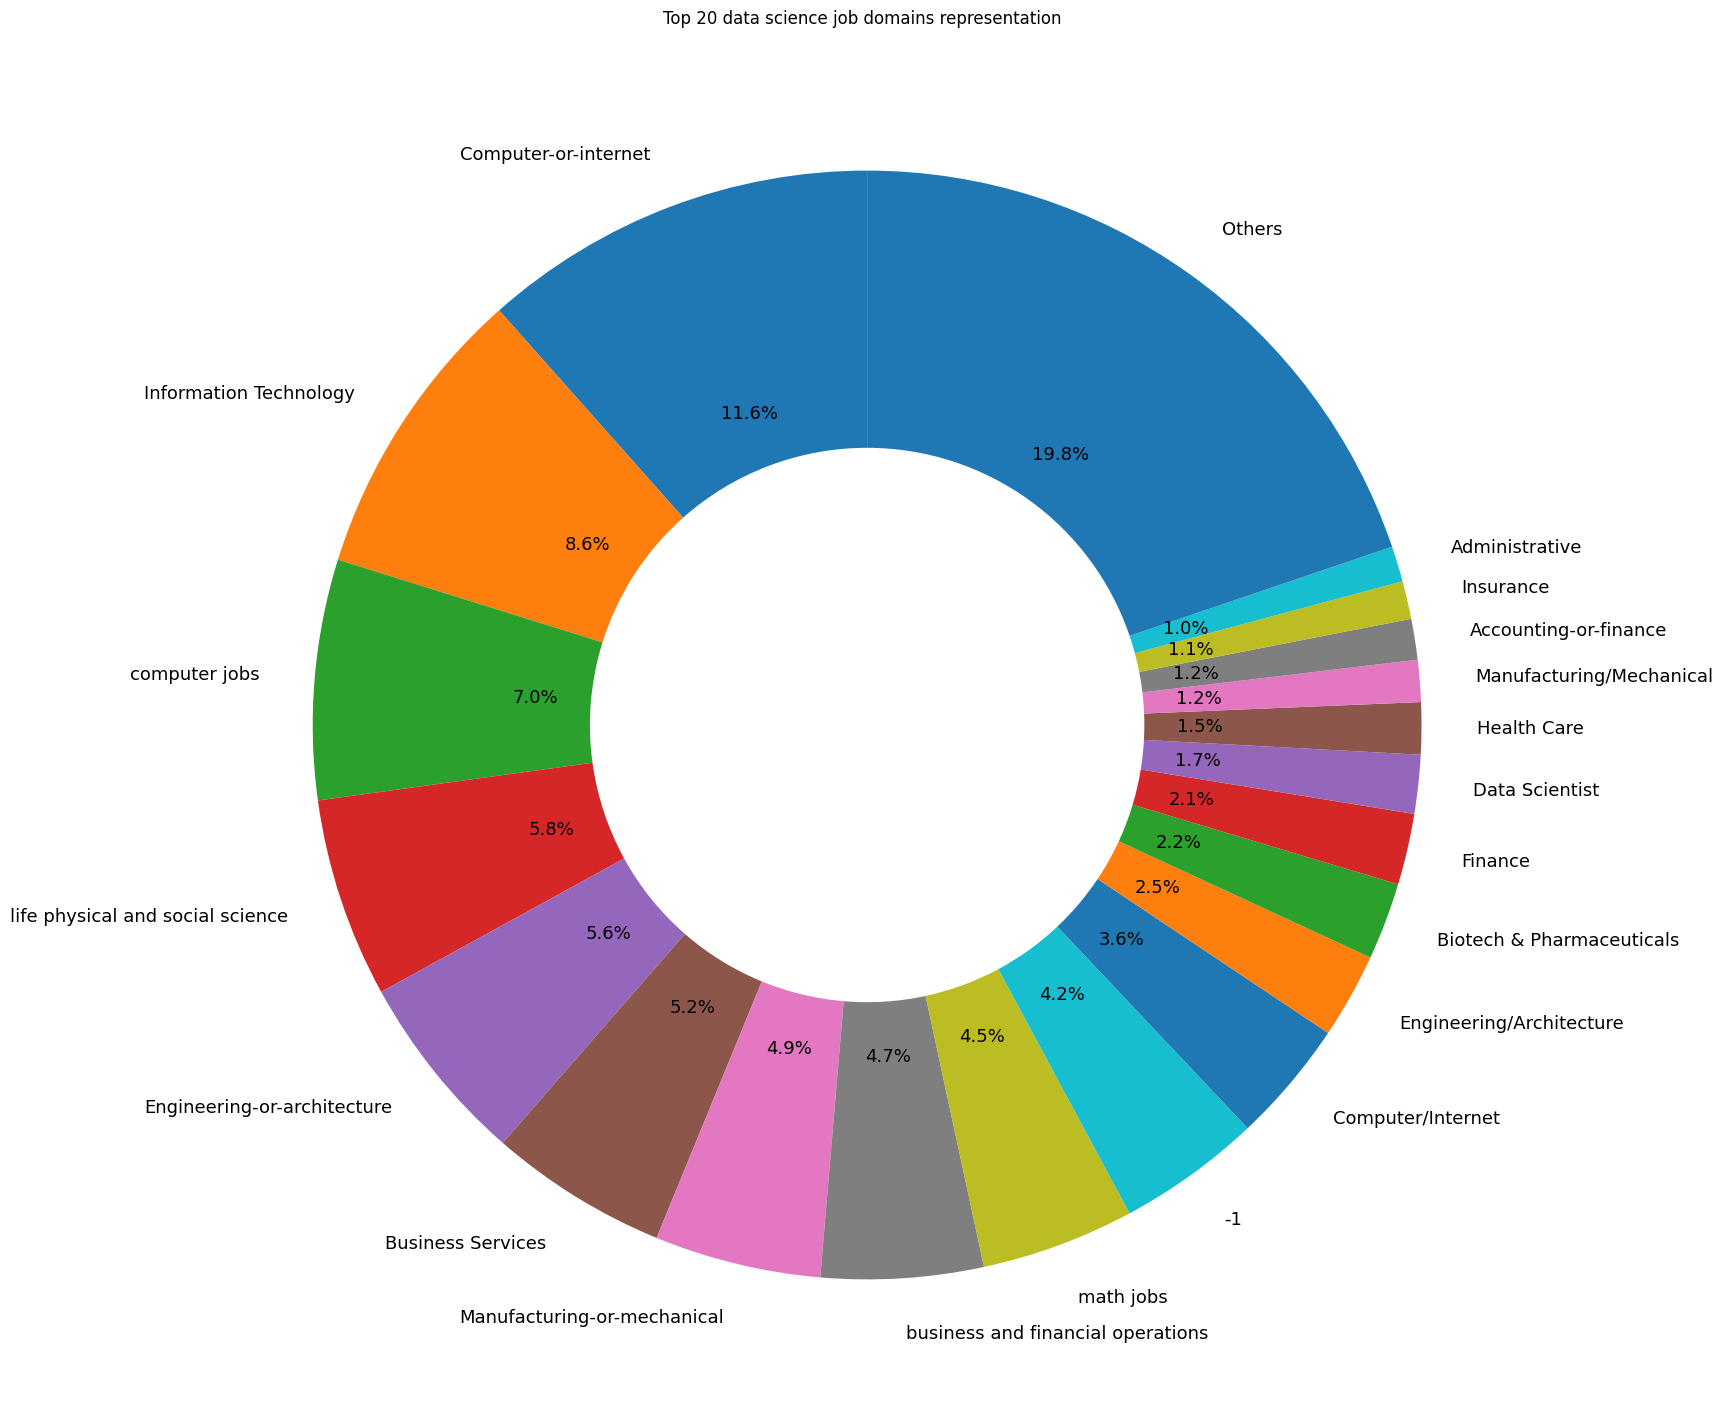

<Figure size 640x480 with 0 Axes>

In [ ]:
#plotting domain representation for top 20 domains

fig = plt.figure(figsize=(30, 18))

grouped = jobs.groupby('domain').size().reset_index(name='count')

sorted_grouped = grouped.sort_values(by='count', ascending=False)

top_20 = sorted_grouped.head(20)
others = pd.DataFrame({
    'domain': ['Others'],
    'count': [sorted_grouped['count'][20:].sum()]
})
top_20 = pd.concat([top_20, others])

# Create a pie chart using the top 20 values and "Others"
plt.pie(top_20['count'], labels=top_20['domain'], textprops={'fontsize': 13},autopct='%1.1f%%' ,startangle=90, wedgeprops={'width': 0.5})
plt.title('Top 20 data science job domains representation  ')
plt.show()
plt.savefig('Sectors.png')

In [ ]:
jobs['salary'] = jobs['salary'].fillna('0').str.replace('$', '').str.replace(',', '')

<ipython-input-75-295b1518c615>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jobs['salary'] = jobs['salary'].fillna('0').str.replace('$', '').str.replace(',', '')


In [ ]:
salary = jobs['salary']

In [ ]:
jobs['salary'].dtypes

dtype('O')

In [ ]:
jobs['salary'].sample(10)

7331                                                     0
8281                                                     0
13927                                                    0
16266                                                    0
4972                                                     0
14185    55000.00\r\n            -\r\n            70000.00
3982                                                     0
11006                            60K-105K (Glassdoor est.)
1490                                                     0
8784                                            80K - 100K
Name: salary, dtype: object

In [ ]:
# using regex I wanto to only keep numeric information from that column
# passing this function:

jobs['salary'] = jobs['salary'].apply(lambda x: re.findall('\d+', x))

In [ ]:
jobs['salary'].sample(10)

14504           [0]
5467            [0]
12149    [114, 146]
5997            [0]
16325           [0]
2717            [0]
8315            [0]
4444            [0]
8384            [0]
3859            [0]
Name: salary, dtype: object

In [ ]:
# for this range values in our salary column;
# I would like to store that as a single value;
# Thus I would get the mean for that and keep it this way 

# A function to strip the range 
def range_mean(x):
    # Check if x is a list
    if isinstance(x, list):
        # Filter out zeros and convert each value to a numeric type
        x = [float(v) for v in x if v != 0]
        # If x is now empty, return 0
        if not x:
            return 0
        # If x contains a single value, return that value as a float
        elif len(x) == 1:
            return x[0]
        # Compute the mean of the list
        else:
            return sum(x) / len(x)
    else:
        # Return the single value as a float
        return float(x)
# Then computing its mean and returning

jobs['mean'] = jobs['salary'].apply(range_mean)

In [ ]:
jobs = jobs.drop(columns = 'salary', axis =1 )

In [ ]:
jobs = jobs.rename( columns = {'salary':'mean'})

In [ ]:
jobs

,job_ID,job_title,domain,company_name,location,job_description,mean
0,1,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,Read what people are saying about working here...,0.0
1,2,Data Scientist,NaN,Luxoft USA Inc,Middletown,We have an immediate opening for a Sharp Data ...,0.0
2,3,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,Candidates should have the following backgroun...,0.0
3,4,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,Read what people are saying about working here...,0.0
4,5,Senior Data Scientist,biotech,CyberCoders,Charlotte,We are seeking an extraordinary Data Scientist...,0.0
...,...,...,...,...,...,...,...
16757,16758,Junior Data Analyst,NaN,Iris Software Inc.,"Texas, United States","Iris's client, one of the world's largest fina...",0.0
16758,16759,Data Analyst (SQL),NaN,Marwood Group,New York City Metropolitan Area,The Marwood Group (Marwood) is a leading healt...,42500.0
16759,16760,Data Analyst,NaN,SmartSense by Digi,"Mishawaka, IN","Join a high-performing, tight-knit team at a f...",0.0
16760,16761,Data Analyst,NaN,Synergy Search,Nashville Metropolitan Area,Nashville (Berry Hill) based company looking t...,45000.0


In [ ]:
jobs['mean'] = jobs['mean']*1000 

In [ ]:
jobs['mean'].sample(12)

15698    63750000.0
11194      129000.0
16212           0.0
12301       54000.0
8262            0.0
9412            0.0
8832        90000.0
8003            0.0
2402            0.0
7736            0.0
10769       98000.0
6055            0.0
Name: mean, dtype: float64

In [ ]:
bins = [0,50000,70000,90000,110000,130000,150000,170000,190000,210000,250000,300000,350000,400000,500000,600000] 

In [ ]:
binned_data = pd.cut(jobs['mean'], bins=bins, include_lowest=True)

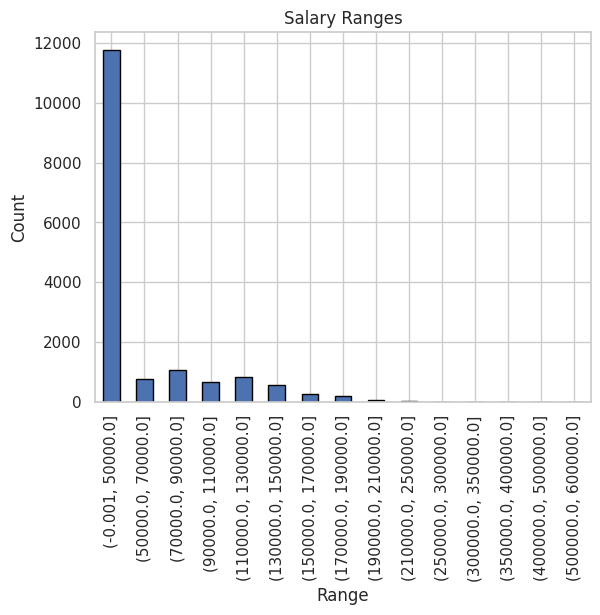

<Figure size 640x480 with 0 Axes>

In [ ]:
# Count the number of values in each bucket using `value_counts`
counts = binned_data.value_counts(sort=False)

# Create a bar chart of the counts
ax = counts.plot(kind='bar', edgecolor='black')

# Set axis labels and title
ax.set_xlabel('Range')
ax.set_ylabel('Count')
ax.set_title('Salary Ranges')

# Show the plot
plt.show()
plt.savefig("salaries.png")

In [ ]:
counts 

(-0.001, 50000.0]       11774
(50000.0, 70000.0]        774
(70000.0, 90000.0]       1056
(90000.0, 110000.0]       679
(110000.0, 130000.0]      821
(130000.0, 150000.0]      551
(150000.0, 170000.0]      265
(170000.0, 190000.0]      212
(190000.0, 210000.0]       60
(210000.0, 250000.0]       44
(250000.0, 300000.0]        0
(300000.0, 350000.0]        0
(350000.0, 400000.0]        3
(400000.0, 500000.0]        0
(500000.0, 600000.0]        0
Name: mean, dtype: int64

In [ ]:
percentage = 11774/ len(jobs)
percentage 

0.7024221453287197